# Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# EDA

In [3]:
print('The columns of {} are {}'.format('train set',train.columns))
print('The columns of {} are {}'.format('test set',test.columns))

The columns of train set are Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
The columns of test set are Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [5]:
#We need to see how many Survived and how many were dead

train['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

38% people survived from the Titanic disaster

# Bivariate Analysis

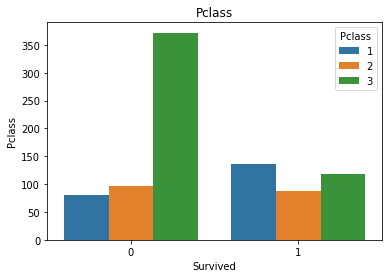

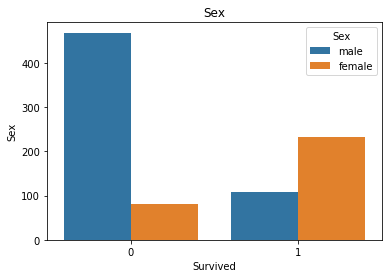

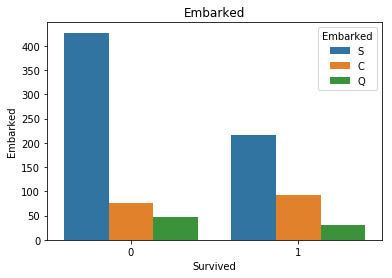

In [6]:
#Trying different columns to see how they are distributed with Survived and Non Survived ones
catg_features = ['Pclass','Sex','Embarked']

for feature in catg_features:
    sns.countplot(train['Survived'],hue = train[feature])
    plt.xlabel('Survived')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

From countplots we can observe that people belonging to Pclass = 1,sex = Female & Embarked = C have higher chance of survival

In [7]:
train['Total Members'] = train['SibSp']+train['Parch']
test['Total Members']=test['SibSp']+test['Parch']

Sibling,Spouses and Parents,children are family memebrs, we can have count of total family members instead and can remove SibSp
and Parch from our actual data

In [8]:
train.drop(columns=['SibSp','Parch','PassengerId','Name'],inplace=True)
test.drop(columns=['SibSp','Parch','PassengerId','Name'],inplace=True)

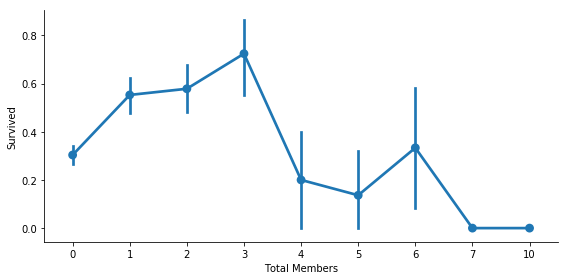

In [9]:
sns.factorplot(x = 'Total Members',y='Survived',data=train,aspect = 2)

The members between 1-3 in a family have larger chance of survival than greater than 3 members

# Dealing with Missing values- Data Imputation

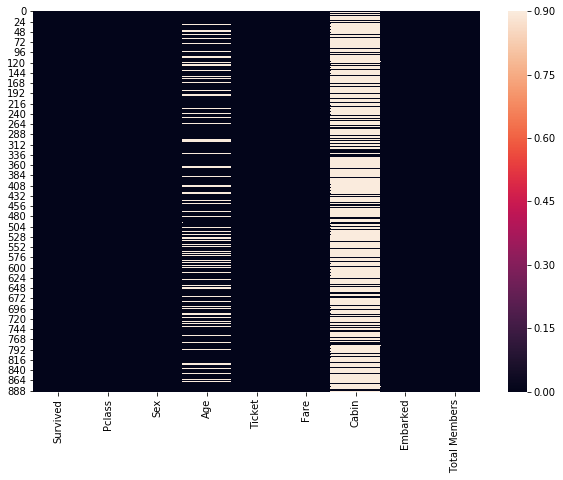

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(),vmax = 0.9)

In [11]:
train.isnull().sum()/891

Survived         0.000000
Pclass           0.000000
Sex              0.000000
Age              0.198653
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245
Total Members    0.000000
dtype: float64

Cabin has 77% data as null so we can remove the data from train set

In [12]:
test.isnull().sum()/418

Pclass           0.000000
Sex              0.000000
Age              0.205742
Ticket           0.000000
Fare             0.002392
Cabin            0.782297
Embarked         0.000000
Total Members    0.000000
dtype: float64

In [13]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [14]:
#For embarked we can use mode
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])
test.Embarked=test.Embarked.fillna(test.Embarked.mode()[0])


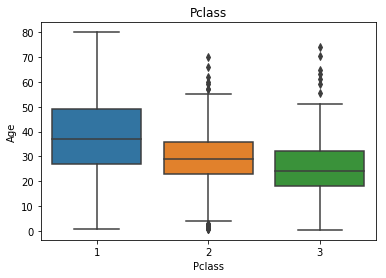

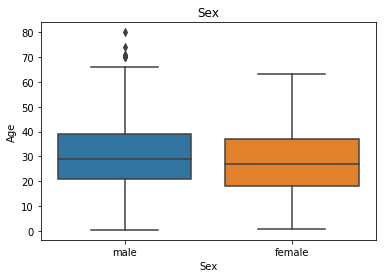

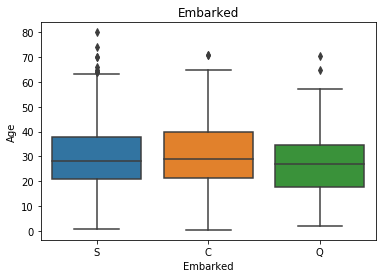

In [15]:
#Checking for relationship between age and other variables
catg_features = ['Pclass','Sex','Embarked']

for cols in catg_features:
    sns.boxplot(train[cols],train['Age'])
    plt.xlabel(cols)
    plt.ylabel('Age')
    plt.title(cols)
    plt.show()

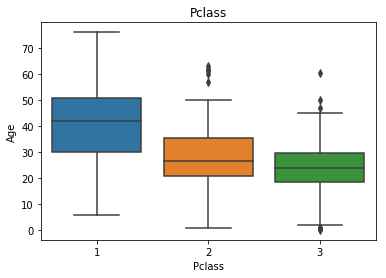

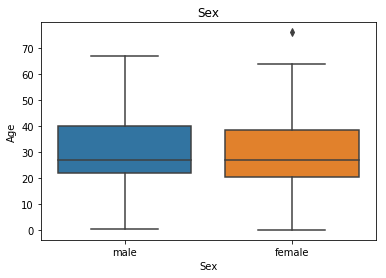

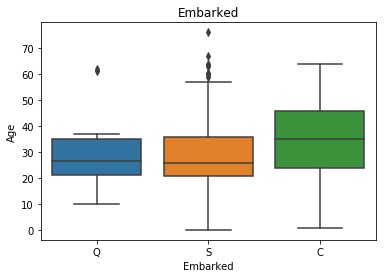

In [16]:
#For test set

for cols in catg_features:
    sns.boxplot(test[cols],test['Age'])
    plt.xlabel(cols)
    plt.ylabel('Age')
    plt.title(cols)
    plt.show()

Clearly there is a relationship between Pclass and Age

In [17]:
#For training set

def impute_Age(cols):
    Pclass=cols[0]
    Age=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
        
    else:
        return Age

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_Age,axis = 1)
test['Age'] = test[['Age','Pclass']].apply(impute_test_age,axis = 1)

In [20]:
print(train.isnull().sum())
print(test.isnull().sum())


Survived         0
Pclass           0
Sex              0
Age              0
Ticket           0
Fare             0
Embarked         0
Total Members    0
dtype: int64
Pclass           0
Sex              0
Age              0
Ticket           0
Fare             1
Embarked         0
Total Members    0
dtype: int64


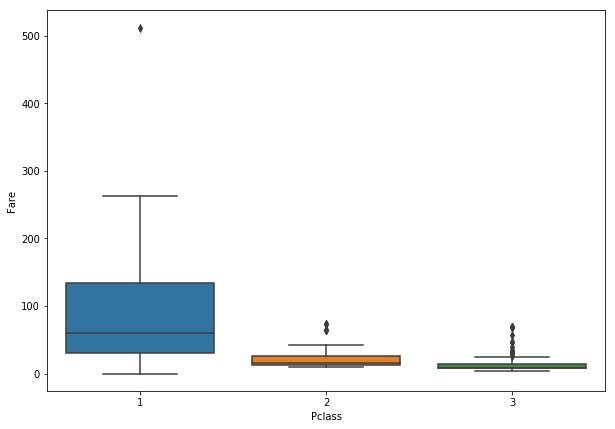

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(test['Pclass'],test['Fare'])

In [22]:
test.groupby(['Pclass']).agg({
    'Fare':np.median})

,Fare
Pclass,
1,60.0000
2,15.7500
3,7.8958


In [23]:
test.Fare = test.Fare.fillna(value = 8)

In [24]:
test.Fare.isnull().sum()

0

In [25]:
#Split the data to X and y

In [26]:
#Now scale the numeric values using Standard Scaler
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
train[['Age','Fare','Total Members']] = scaler.fit_transform(train[['Age','Fare','Total Members']])

In [28]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Total Members
0,0,3,male,0.827377,A/5 21171,-0.502445,S,0.059160
1,1,1,female,-1.566107,PC 17599,0.786845,C,0.059160
2,1,3,female,0.827377,STON/O2. 3101282,-0.488854,S,-0.560975
3,1,1,female,-1.566107,113803,0.420730,S,0.059160
4,0,3,male,0.827377,373450,-0.486337,S,-0.560975


In [29]:
test[['Age','Fare','Total Members']] = scaler.fit_transform(test[['Age','Fare','Total Members']])

In [30]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,Total Members
0,3,male,0.392624,330911,-0.497076,Q,-0.553443
1,3,female,1.355976,363272,-0.511939,S,0.105643
2,2,male,2.511998,240276,-0.463768,Q,-0.553443
3,3,male,-0.185388,315154,-0.482140,S,-0.553443
4,3,female,-0.570729,3101298,-0.417164,S,0.764728


# One hot encoding for Catg variables

In [31]:
#Now use one hot encoding
one_hot = pd.get_dummies(train[['Sex','Embarked']],drop_first=True)
test_hot = pd.get_dummies(test[['Sex','Embarked']],drop_first=True)

In [32]:
train_df = pd.concat([train,one_hot],axis = 1)
test_df = pd.concat([test,test_hot],axis=1)

In [33]:
train_df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Total Members,Sex_male,Embarked_Q,Embarked_S
0,0,3,male,0.827377,A/5 21171,-0.502445,S,0.059160,1,0,1
1,1,1,female,-1.566107,PC 17599,0.786845,C,0.059160,0,0,0
2,1,3,female,0.827377,STON/O2. 3101282,-0.488854,S,-0.560975,0,0,1
3,1,1,female,-1.566107,113803,0.420730,S,0.059160,0,0,1
4,0,3,male,0.827377,373450,-0.486337,S,-0.560975,1,0,1


In [34]:
train_df.drop(columns=['Sex','Embarked'],inplace=True)
test_df.drop(columns=['Sex','Embarked'],inplace=True)

In [35]:
train_df.drop(columns=['Ticket'],inplace=True)
test_df.drop(columns=['Ticket'],inplace=True)

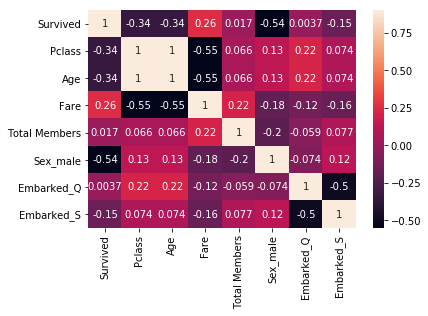

In [36]:
sns.heatmap(train_df.corr(),annot=True,vmax=0.9)

In [37]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Best Model selection

In [38]:
#Now selecting the best model
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost

C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
model_parms = {
    'LogRG':{
        'model': LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
    },
    'SVM':{
        'model': SVC(),
        'params':{
            'C':[1,5,10],
            'kernel':['linear','rbf']
        }
    },
    'tree':{
        'model': tree.DecisionTreeClassifier(),
        'params':{
            'max_depth': [4,5,6]
        }
    },
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[10,100,200]
        }                   
    },
    'XGBoost':{
        'model': xgboost.XGBClassifier(),
        'params':{
            'max_depth':[1,5,10],
            'learning_rate': [0.05,0.1,0.3,0.5],
        }
    }
}

# Split the data into train and test set

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
score = []

for model_name,mp in model_parms.items():
    rgcv = GridSearchCV(mp['model'],mp['params'],cv=5,verbose=3,return_train_score=False)
    rgcv.fit(X_train,y_train)
    score.append({
        'model': model_name,
        'best_score': rgcv.best_score_,
        'best_params': rgcv.best_params_
    }),
    
df = pd.DataFrame(score,columns = ['model','best_score','best_params'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.7761194029850746, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.8432835820895522, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.7611940298507462, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.7669172932330827, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.8421052631578947, total=   0.0s
[CV] C=5 .............................................................
[CV] .................... C=5, score=0.7835820895522388, total=   0.0s
[CV] C=5 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=1, kernel=linear, score=0.8507462686567164, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.7388059701492538, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.7669172932330827, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8195488721804511, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.7835820895522388, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.8656716417910447, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.7985074626865671, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ n_estimators=10, score=0.7761194029850746, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=0.7819548872180451, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ........ n_estimators=10, score=0.8270676691729323, total=   0.0s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.7388059701492538, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] ........ n_estimators=100, score=0.753731343283582, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] ........ n_estimators=100, score=0.753731343283582, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.7969924812030075, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.6s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] learning_rate=0.05, max_depth=1 .................................
[CV]  learning_rate=0.05, max_depth=1, score=0.7835820895522388, total=   0.0s
[CV] learning_rate=0.05, max_depth=1 .................................
[CV]  learning_rate=0.05, max_depth=1, score=0.8656716417910447, total=   0.0s
[CV] learning_rate=0.05, max_depth=1 .................................
[CV]  learning_rate=0.05, max_depth=1, score=0.7761194029850746, total=   0.0s
[CV] learning_rate=0.05, max_depth=1 .................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Use

[CV]  learning_rate=0.05, max_depth=1, score=0.7819548872180451, total=   0.0s
[CV] learning_rate=0.05, max_depth=1 .................................
[CV]  learning_rate=0.05, max_depth=1, score=0.8270676691729323, total=   0.0s
[CV] learning_rate=0.05, max_depth=5 .................................
[CV]  learning_rate=0.05, max_depth=5, score=0.8059701492537313, total=   0.0s
[CV] learning_rate=0.05, max_depth=5 .................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.05, max_depth=5, score=0.8432835820895522, total=   0.0s
[CV] learning_rate=0.05, max_depth=5 .................................
[CV]  learning_rate=0.05, max_depth=5, score=0.7910447761194029, total=   0.0s
[CV] learning_rate=0.05, max_depth=5 .................................
[CV]  learning_rate=0.05, max_depth=5, score=0.7819548872180451, total=   0.0s
[CV] learning_rate=0.05, max_depth=5 .................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.05, max_depth=5, score=0.7969924812030075, total=   0.0s
[CV] learning_rate=0.05, max_depth=10 ................................
[CV]  learning_rate=0.05, max_depth=10, score=0.8134328358208955, total=   0.0s
[CV] learning_rate=0.05, max_depth=10 ................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.05, max_depth=10, score=0.8208955223880597, total=   0.0s
[CV] learning_rate=0.05, max_depth=10 ................................
[CV]  learning_rate=0.05, max_depth=10, score=0.7761194029850746, total=   0.0s
[CV] learning_rate=0.05, max_depth=10 ................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.05, max_depth=10, score=0.7969924812030075, total=   0.0s
[CV] learning_rate=0.05, max_depth=10 ................................
[CV]  learning_rate=0.05, max_depth=10, score=0.8270676691729323, total=   0.0s
[CV] learning_rate=0.1, max_depth=1 ..................................
[CV]  learning_rate=0.1, max_depth=1, score=0.7835820895522388, total=   0.0s
[CV] learning_rate=0.1, max_depth=1 ..................................
[CV]  learning_rate=0.1, max_depth=1, score=0.8656716417910447, total=   0.0s
[CV] learning_rate=0.1, max_depth=1 ..................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

[CV]  learning_rate=0.1, max_depth=1, score=0.7611940298507462, total=   0.0s
[CV] learning_rate=0.1, max_depth=1 ..................................
[CV]  learning_rate=0.1, max_depth=1, score=0.7593984962406015, total=   0.0s
[CV] learning_rate=0.1, max_depth=1 ..................................
[CV]  learning_rate=0.1, max_depth=1, score=0.8270676691729323, total=   0.0s
[CV] learning_rate=0.1, max_depth=5 ..................................
[CV]  learning_rate=0.1, max_depth=5, score=0.8059701492537313, total=   0.0s
[CV] learning_rate=0.1, max_depth=5 ..................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

[CV]  learning_rate=0.1, max_depth=5, score=0.835820895522388, total=   0.0s
[CV] learning_rate=0.1, max_depth=5 ..................................
[CV]  learning_rate=0.1, max_depth=5, score=0.7835820895522388, total=   0.0s
[CV] learning_rate=0.1, max_depth=5 ..................................
[CV]  learning_rate=0.1, max_depth=5, score=0.7894736842105263, total=   0.0s
[CV] learning_rate=0.1, max_depth=5 ..................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=5, score=0.8120300751879699, total=   0.0s
[CV] learning_rate=0.1, max_depth=10 .................................
[CV]  learning_rate=0.1, max_depth=10, score=0.8134328358208955, total=   0.0s
[CV] learning_rate=0.1, max_depth=10 .................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.1, max_depth=10, score=0.7985074626865671, total=   0.0s
[CV] learning_rate=0.1, max_depth=10 .................................
[CV]  learning_rate=0.1, max_depth=10, score=0.7835820895522388, total=   0.0s
[CV] learning_rate=0.1, max_depth=10 .................................
[CV]  learning_rate=0.1, max_depth=10, score=0.8120300751879699, total=   0.0s
[CV] learning_rate=0.1, max_depth=10 .................................
[CV]  learning_rate=0.1, max_depth=10, score=0.8270676691729323, total=   0.0s
[CV] learning_rate=0.3, max_depth=1 ..................................
[CV]  learning_rate=0.3, max_depth=1, score=0.7910447761194029, total=   0.0s
[CV] learning_rate=0.3, max_depth=1 ..................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

[CV]  learning_rate=0.3, max_depth=1, score=0.8656716417910447, total=   0.0s
[CV] learning_rate=0.3, max_depth=1 ..................................
[CV]  learning_rate=0.3, max_depth=1, score=0.7686567164179104, total=   0.0s
[CV] learning_rate=0.3, max_depth=1 ..................................
[CV]  learning_rate=0.3, max_depth=1, score=0.7518796992481203, total=   0.0s
[CV] learning_rate=0.3, max_depth=1 ..................................
[CV]  learning_rate=0.3, max_depth=1, score=0.8270676691729323, total=   0.0s
[CV] learning_rate=0.3, max_depth=5 ..................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.3, max_depth=5, score=0.7761194029850746, total=   0.0s
[CV] learning_rate=0.3, max_depth=5 ..................................
[CV]  learning_rate=0.3, max_depth=5, score=0.7910447761194029, total=   0.0s
[CV] learning_rate=0.3, max_depth=5 ..................................
[CV]  learning_rate=0.3, max_depth=5, score=0.7761194029850746, total=   0.0s
[CV] learning_rate=0.3, max_depth=5 ..................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.3, max_depth=5, score=0.7894736842105263, total=   0.0s
[CV] learning_rate=0.3, max_depth=5 ..................................
[CV]  learning_rate=0.3, max_depth=5, score=0.8421052631578947, total=   0.0s
[CV] learning_rate=0.3, max_depth=10 .................................
[CV]  learning_rate=0.3, max_depth=10, score=0.7686567164179104, total=   0.0s
[CV] learning_rate=0.3, max_depth=10 .................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.3, max_depth=10, score=0.7910447761194029, total=   0.0s
[CV] learning_rate=0.3, max_depth=10 .................................
[CV]  learning_rate=0.3, max_depth=10, score=0.7611940298507462, total=   0.0s
[CV] learning_rate=0.3, max_depth=10 .................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.3, max_depth=10, score=0.8045112781954887, total=   0.0s
[CV] learning_rate=0.3, max_depth=10 .................................
[CV]  learning_rate=0.3, max_depth=10, score=0.8421052631578947, total=   0.0s
[CV] learning_rate=0.5, max_depth=1 ..................................
[CV]  learning_rate=0.5, max_depth=1, score=0.7835820895522388, total=   0.0s
[CV] learning_rate=0.5, max_depth=1 ..................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, b

[CV]  learning_rate=0.5, max_depth=1, score=0.8582089552238806, total=   0.0s
[CV] learning_rate=0.5, max_depth=1 ..................................
[CV]  learning_rate=0.5, max_depth=1, score=0.7761194029850746, total=   0.0s
[CV] learning_rate=0.5, max_depth=1 ..................................
[CV]  learning_rate=0.5, max_depth=1, score=0.7593984962406015, total=   0.0s
[CV] learning_rate=0.5, max_depth=1 ..................................
[CV]  learning_rate=0.5, max_depth=1, score=0.8270676691729323, total=   0.0s
[CV] learning_rate=0.5, max_depth=5 ..................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.5, max_depth=5, score=0.7835820895522388, total=   0.0s
[CV] learning_rate=0.5, max_depth=5 ..................................
[CV]  learning_rate=0.5, max_depth=5, score=0.8059701492537313, total=   0.0s
[CV] learning_rate=0.5, max_depth=5 ..................................
[CV]  learning_rate=0.5, max_depth=5, score=0.7686567164179104, total=   0.0s
[CV] learning_rate=0.5, max_depth=5 ..................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.5, max_depth=5, score=0.7969924812030075, total=   0.0s
[CV] learning_rate=0.5, max_depth=5 ..................................
[CV]  learning_rate=0.5, max_depth=5, score=0.8270676691729323, total=   0.0s
[CV] learning_rate=0.5, max_depth=10 .................................
[CV]  learning_rate=0.5, max_depth=10, score=0.7611940298507462, total=   0.0s
[CV] learning_rate=0.5, max_depth=10 .................................


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  learning_rate=0.5, max_depth=10, score=0.7835820895522388, total=   0.0s
[CV] learning_rate=0.5, max_depth=10 .................................
[CV]  learning_rate=0.5, max_depth=10, score=0.7611940298507462, total=   0.0s
[CV] learning_rate=0.5, max_depth=10 .................................
[CV]  learning_rate=0.5, max_depth=10, score=0.8120300751879699, total=   0.0s
[CV] learning_rate=0.5, max_depth=10 .................................
[CV]  learning_rate=0.5, max_depth=10, score=0.8571428571428571, total=   0.0s


C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.4s finished


In [45]:
df

,model,best_score,best_params
0,LogRG,0.799401,{'C': 5}
1,SVM,0.805389,"{'C': 1, 'kernel': 'rbf'}"
2,tree,0.788922,{'max_depth': 4}
3,RandomForest,0.785928,{'n_estimators': 200}
4,XGBoost,0.806886,"{'learning_rate': 0.05, 'max_depth': 1}"


XGBoost seems to be performing better than other models at learning rate : 0.05 & max depth:1

# Predict and model evaluation

In [46]:
#Now predict the test set
xgb = xgboost.XGBClassifier(max_depth=1,learning_rate=0.05)

In [47]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.05, max_delta_step=0, max_depth=1,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [48]:
pred = xgb.predict(X_test)

C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       134
          1       0.81      0.70      0.75        89

avg / total       0.81      0.81      0.81       223

[[119  15]
 [ 27  62]]


# Predict on Actual test set

In [51]:
test_df.head()

,Pclass,Age,Fare,Total Members,Sex_male,Embarked_Q,Embarked_S
0,3,0.392624,-0.497076,-0.553443,1,1,0
1,3,1.355976,-0.511939,0.105643,0,0,1
2,2,2.511998,-0.463768,-0.553443,1,1,0
3,3,-0.185388,-0.482140,-0.553443,1,0,1
4,3,-0.570729,-0.417164,0.764728,0,0,1


In [52]:
test_pred = xgb.predict(test_df)

C:\Users\Prerna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
predict_df = pd.DataFrame(test_pred,columns=['Survived'])

Read the sample dataset

In [54]:
sample = pd.read_csv('gender_submission.csv')

In [55]:
final_data = pd.concat([sample.PassengerId,predict_df],axis = 1)

In [56]:
final_data.to_csv('Final_data.csv',index=False)